In [3]:
from helper_functions import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
df = pd.read_csv("flo_data_20k.csv")

In [7]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [9]:
df.shape

(19945, 12)

In [11]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [12]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 19945
Variables: 12
cat_cols: 2
num_cols: 4
cat_but_car: 6
num_but_cat: 0


             order_channel  Ratio
Android App           9495 47.606
Mobile                4882 24.477
Ios App               2833 14.204
Desktop               2735 13.713
##########################################


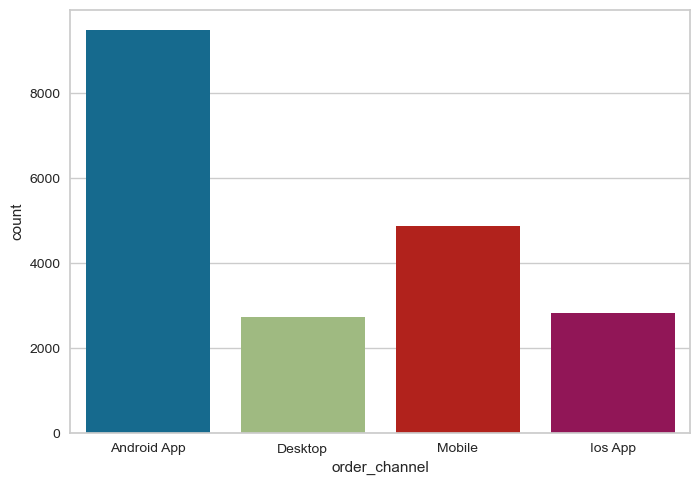

             last_order_channel  Ratio
Android App                6783 34.009
Offline                    6608 33.131
Mobile                     3172 15.904
Ios App                    1696  8.503
Desktop                    1686  8.453
##########################################


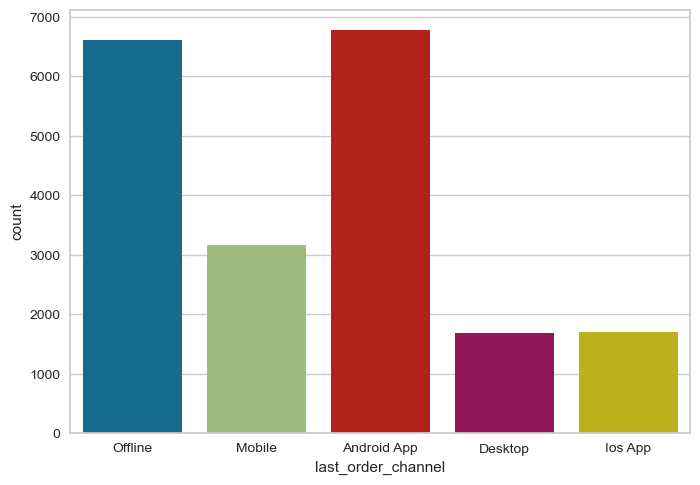

In [13]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [15]:
low_limit, up_limit = outlier_thresholds(df, df.columns, .01, .99)

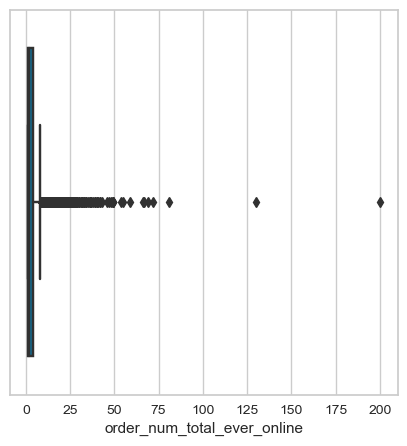

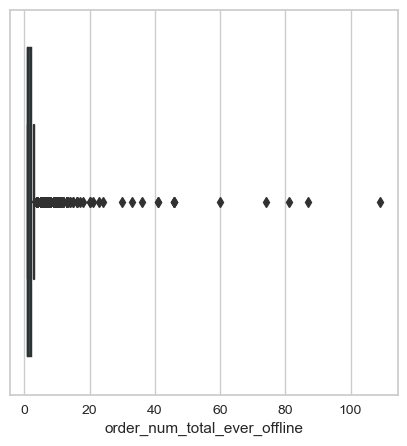

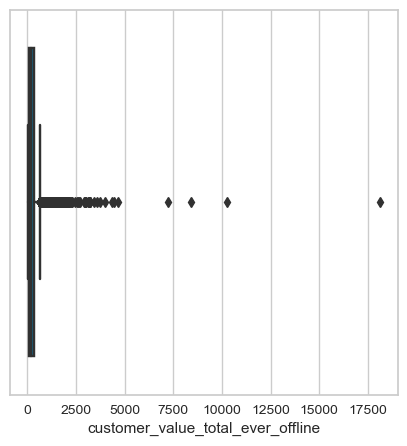

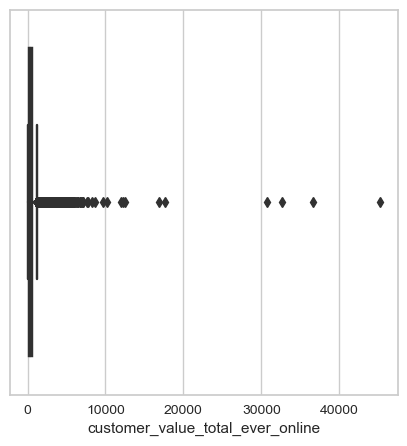

In [16]:
for col in num_cols:
    boxplot_outliers(df, col)

In [17]:
for col in num_cols:
    print(col, ':', check_outlier(df, col, .01, .99))

order_num_total_ever_online : True
order_num_total_ever_offline : True
customer_value_total_ever_offline : True
customer_value_total_ever_online : True


In [18]:
for col in num_cols:
    replace_with_thresholds(df, col, .01, .99)

In [19]:
for col in num_cols:
    print(col, ':', check_outlier(df, col, .01, .99))

order_num_total_ever_online : False
order_num_total_ever_offline : False
customer_value_total_ever_offline : False
customer_value_total_ever_online : False


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.092,3.814,1.000,1.000,2.000,4.000,48.500
order_num_total_ever_offline,19945.000,1.886,1.435,1.000,1.000,1.000,2.000,16.000
customer_value_total_ever_offline,19945.000,251.921,251.023,10.000,99.990,179.980,319.970,3019.882
customer_value_total_ever_online,19945.000,489.705,632.606,12.990,149.980,286.460,578.440,7799.541


In [21]:
df['frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [23]:
df['first_order_date'] = pd.to_datetime(df['first_order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [25]:
df['last_order_date'].max() 

Timestamp('2021-05-30 00:00:00')

In [27]:
today_date = dt.datetime(2021, 6, 1) # +2 days
today_date

datetime.datetime(2021, 6, 1, 0, 0)

In [28]:
df["tenure"] = (today_date - df["first_order_date"]).dt.days

df["recency"] = (today_date - df["last_order_date"]).dt.days

In [29]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,frequency,monetary,tenure,recency
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370,214,95
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550,1574,105
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320,552,186
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970,146,135
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980,668,86


In [30]:
base_df = df.copy()
base_df2 = df.copy()

In [31]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 19945
Variables: 16
cat_cols: 2
num_cols: 12
cat_but_car: 2
num_but_cat: 0


In [33]:
num_cols = [col for col in num_cols if "date" not in col]
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'frequency',
 'monetary',
 'tenure',
 'recency']

In [35]:
df[num_cols] = MinMaxScaler((0, 1)).fit_transform(df[num_cols])
df[num_cols]

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,tenure,recency
0,0.063,0.000,0.043,0.101,0.055,0.099,0.068,0.255
1,0.379,0.067,0.050,0.236,0.345,0.218,0.514,0.282
2,0.042,0.067,0.060,0.049,0.055,0.060,0.179,0.504
3,0.000,0.000,0.010,0.009,0.000,0.009,0.046,0.364
4,0.000,0.000,0.013,0.019,0.000,0.018,0.217,0.230
...,...,...,...,...,...,...,...,...
19940,0.000,0.067,0.093,0.013,0.018,0.040,0.201,0.901
19941,0.000,0.000,0.047,0.029,0.000,0.038,0.148,0.436
19942,0.021,0.000,0.043,0.062,0.018,0.065,0.204,0.016
19943,0.000,0.267,0.233,0.037,0.073,0.107,0.259,0.290


In [38]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['order_channel', 'last_order_channel']

In [39]:
df = one_hot_encoder(df, ohe_cols)

In [40]:
df.head()

,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,frequency,monetary,tenure,recency,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,0.063,0.000,0.043,0.101,[KADIN],0.055,0.099,0.068,0.255,0,0,0,0,0,0,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,0.379,0.067,0.050,0.236,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",0.345,0.218,0.514,0.282,0,0,0,0,0,1,0
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,0.042,0.067,0.060,0.049,"[ERKEK, KADIN]",0.055,0.060,0.179,0.504,0,0,0,0,0,0,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,0.000,0.000,0.010,0.009,"[AKTIFCOCUK, COCUK]",0.000,0.009,0.046,0.364,0,0,0,0,0,0,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,0.000,0.000,0.013,0.019,[AKTIFSPOR],0.000,0.018,0.217,0.230,1,0,0,1,0,0,0


In [42]:
category_list = ["AKTIFCOCUK", "AKTIFSPOR", "COCUK", "ERKEK", "KADIN"]

for category in category_list:
    df[category] = [int(category in x) for x in df["interested_in_categories_12"]]

In [47]:
df[category_list].head()

,AKTIFCOCUK,AKTIFSPOR,COCUK,ERKEK,KADIN
0,0,0,0,0,1
1,0,1,1,1,1
2,0,0,0,1,1
3,1,0,1,0,0
4,0,1,0,0,0


In [48]:
df.head()

,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,frequency,monetary,tenure,recency,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,AKTIFCOCUK,AKTIFSPOR,COCUK,ERKEK,KADIN
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,0.063,0.000,0.043,0.101,[KADIN],0.055,0.099,0.068,0.255,0,0,0,0,0,0,1,0,0,0,0,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,0.379,0.067,0.050,0.236,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",0.345,0.218,0.514,0.282,0,0,0,0,0,1,0,0,1,1,1,1
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,0.042,0.067,0.060,0.049,"[ERKEK, KADIN]",0.055,0.060,0.179,0.504,0,0,0,0,0,0,0,0,0,0,1,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,0.000,0.000,0.010,0.009,"[AKTIFCOCUK, COCUK]",0.000,0.009,0.046,0.364,0,0,0,0,0,0,0,1,0,1,0,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,0.000,0.000,0.013,0.019,[AKTIFSPOR],0.000,0.018,0.217,0.230,1,0,0,1,0,0,0,0,1,0,0,0


In [49]:
new_df = df.iloc[:,5:]
new_df = new_df.drop("interested_in_categories_12", axis=1)
new_df

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,tenure,recency,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,AKTIFCOCUK,AKTIFSPOR,COCUK,ERKEK,KADIN
0,0.063,0.000,0.043,0.101,0.055,0.099,0.068,0.255,0,0,0,0,0,0,1,0,0,0,0,1
1,0.379,0.067,0.050,0.236,0.345,0.218,0.514,0.282,0,0,0,0,0,1,0,0,1,1,1,1
2,0.042,0.067,0.060,0.049,0.055,0.060,0.179,0.504,0,0,0,0,0,0,0,0,0,0,1,1
3,0.000,0.000,0.010,0.009,0.000,0.009,0.046,0.364,0,0,0,0,0,0,0,1,0,1,0,0
4,0.000,0.000,0.013,0.019,0.000,0.018,0.217,0.230,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,0.000,0.067,0.093,0.013,0.018,0.040,0.201,0.901,0,0,0,0,0,0,1,0,1,0,1,0
19941,0.000,0.000,0.047,0.029,0.000,0.038,0.148,0.436,1,0,0,1,0,0,0,0,1,0,0,0
19942,0.021,0.000,0.043,0.062,0.018,0.065,0.204,0.016,0,1,0,0,1,0,0,0,1,0,0,0
19943,0.000,0.267,0.233,0.037,0.073,0.107,0.259,0.290,0,0,0,0,0,0,0,0,1,0,1,0


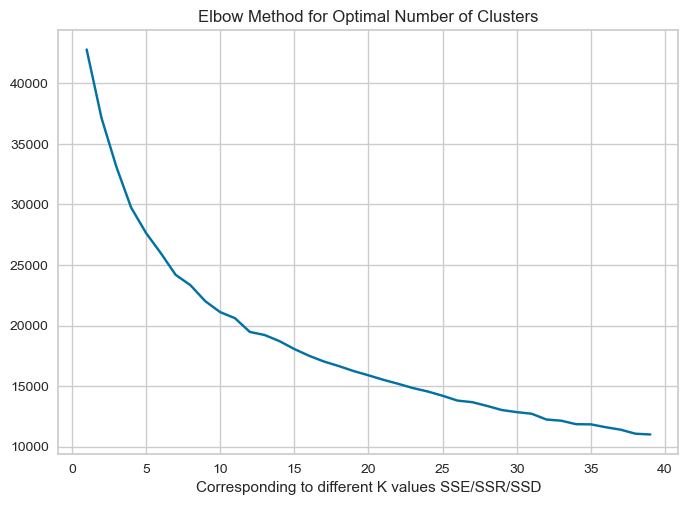

In [53]:
kmeans = KMeans()
ssd = []
K = range(1, 40)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(new_df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Corresponding to different K values SSE/SSR/SSD")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show(block=True)


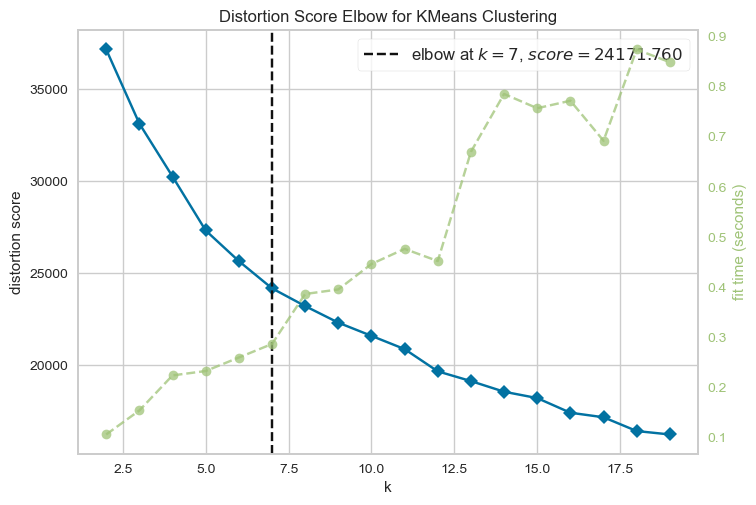

In [51]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(new_df)
elbow.show()
plt.show(block=True)

In [52]:
elbow.elbow_value_

7

In [54]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(new_df)

In [55]:
kmeans.n_clusters

7

In [56]:
kmeans.cluster_centers_

array([[ 2.95063888e-02,  4.05105973e-02,  6.53309528e-02,
         4.65644298e-02,  3.65311350e-02,  5.95703753e-02,
         2.32437466e-01,  3.30593277e-01,  8.60422844e-16,
        -3.60822483e-16,  1.00000000e+00,  2.77555756e-17,
         4.30211422e-16,  1.00000000e+00, -1.38777878e-15,
         1.46676301e-01,  4.15462428e-01,  2.61921965e-01,
         2.34465318e-01,  3.28395954e-01],
       [ 2.09057528e-02,  5.55602537e-02,  8.37771299e-02,
         3.71745025e-02,  3.32077648e-02,  5.76194210e-02,
         3.54014457e-01,  4.19663471e-01,  1.00000000e+00,
        -2.77555756e-16, -5.27355937e-16,  4.42283298e-01,
         3.74700271e-16, -1.11022302e-16,  5.57716702e-01,
        -3.88578059e-16,  4.09302326e-01,  1.39957717e-01,
         3.08668076e-01,  3.86046512e-01],
       [ 7.16947138e-02,  8.90021850e-02,  9.58552661e-02,
         8.74563253e-02,  8.61914851e-02,  1.05064588e-01,
         2.83828047e-01,  3.20735516e-01,  1.34741442e-01,
         6.40932265e-02,  1.2

In [57]:
kmeans.labels_

array([4, 6, 3, ..., 5, 6, 6])

In [59]:
new_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,tenure,recency,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,AKTIFCOCUK,AKTIFSPOR,COCUK,ERKEK,KADIN
0,0.063,0.000,0.043,0.101,0.055,0.099,0.068,0.255,0,0,0,0,0,0,1,0,0,0,0,1
1,0.379,0.067,0.050,0.236,0.345,0.218,0.514,0.282,0,0,0,0,0,1,0,0,1,1,1,1
2,0.042,0.067,0.060,0.049,0.055,0.060,0.179,0.504,0,0,0,0,0,0,0,0,0,0,1,1
3,0.000,0.000,0.010,0.009,0.000,0.009,0.046,0.364,0,0,0,0,0,0,0,1,0,1,0,0
4,0.000,0.000,0.013,0.019,0.000,0.018,0.217,0.230,1,0,0,1,0,0,0,0,1,0,0,0


In [60]:
base_df["cluster"] = kmeans.labels_

In [66]:
base_df["cluster"].sort_values(ascending=True).head()

12241    0
10528    0
17291    0
17278    0
17271    0
Name: cluster, dtype: int32

In [67]:
base_df["cluster"] = base_df["cluster"] + 1

In [68]:
base_df["cluster"].sort_values(ascending=True).head()

12241    1
10528    1
17291    1
17278    1
17271    1
Name: cluster, dtype: int32

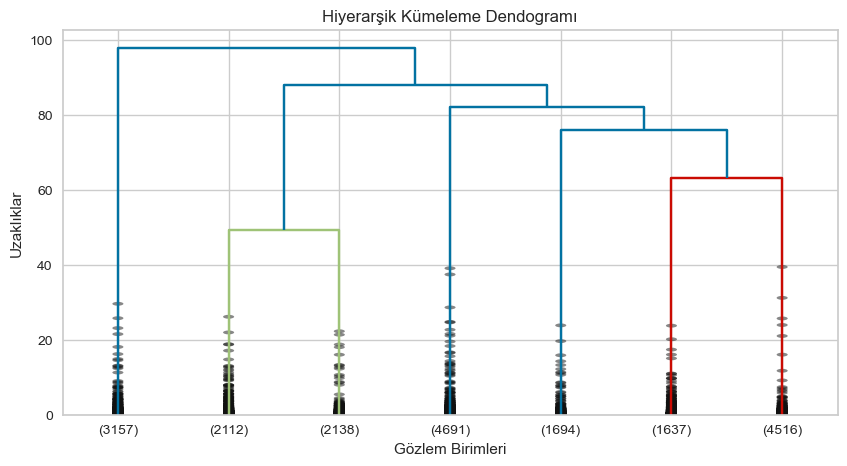

In [70]:
hc_ward = linkage(new_df, "ward")

plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_ward,
            truncate_mode="lastp",
            p=7,
            show_contracted=True,
            leaf_font_size=10)
plt.show(block=True)

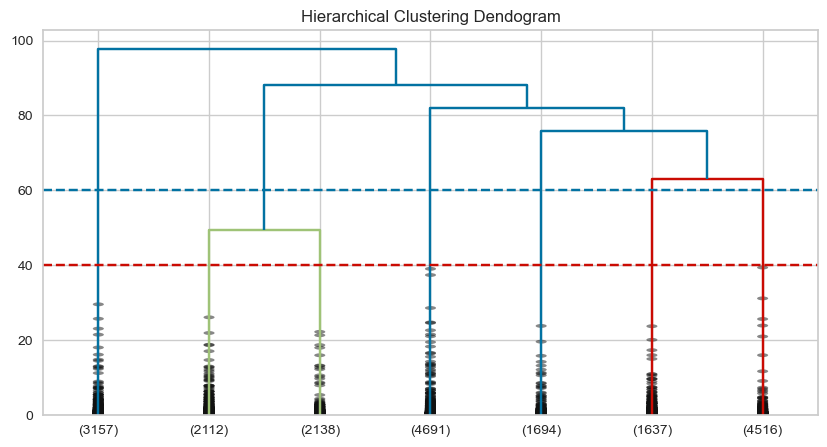

In [71]:
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendogram")
dend = dendrogram(hc_ward,
                 truncate_mode="lastp",
                  p=7,
                  show_contracted=True,
                  leaf_font_size=10)
plt.axhline(y=60, color="b", linestyle="--")
plt.axhline(y=40, color="r", linestyle="--")
plt.show(block=True)

In [72]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, linkage="ward")

clusters = cluster.fit_predict(new_df)

In [73]:
base_df2["hi_cluster_no"] = clusters

base_df2["hi_cluster_no"] = base_df2["hi_cluster_no"] + 1

In [74]:
base_df2.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,frequency,monetary,tenure,recency,hi_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370,214,95,2
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550,1574,105,4
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320,552,186,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970,146,135,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980,668,86,6


In [81]:
# Kmeans
base_df[["master_id", "cluster"]]

,master_id,cluster
0,cc294636-19f0-11eb-8d74-000d3a38a36f,5
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,7
2,69b69676-1a40-11ea-941b-000d3a38a36f,4
3,1854e56c-491f-11eb-806e-000d3a38a36f,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2
...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,7
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,2
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,6
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,7


In [80]:
# AgglomerativeClustering
base_df2[["master_id", "hi_cluster_no"]]

,master_id,hi_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,4
2,69b69676-1a40-11ea-941b-000d3a38a36f,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,6
...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,2
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,6
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,5
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,1


In [82]:
base_df["cluster"].value_counts()

7    3819
5    3481
4    3070
1    2768
3    2746
2    2365
6    1696
Name: cluster, dtype: int64

In [83]:
base_df2["hi_cluster_no"].value_counts()

2    4691
1    4516
4    3157
3    2138
7    2112
5    1694
6    1637
Name: hi_cluster_no, dtype: int64

In [69]:
base_cols = ['order_channel', 'last_order_channel', 'order_num_total_ever_online',
             'order_num_total_ever_offline','customer_value_total_ever_offline',
             'customer_value_total_ever_online','interested_in_categories_12',
             'frequency','monetary','tenure']

base_df.groupby("cluster")[base_cols].agg(["count", "mean", "median", "sum"])

order_num_total_ever_online                        order_num_total_ever_offline                       customer_value_total_ever_offline                             customer_value_total_ever_online                             frequency                        monetary                             tenure                          
                              count  mean median       sum                        count  mean median      sum                             count    mean  median         sum                            count    mean  median         sum     count  mean median       sum    count    mean  median         sum  count     mean  median      sum
cluster                                                                                                                                                                                                                                                                                                                                        
1                              2768 2.402  1.000  6647.500                         2768 1.608  1.000 4450.000                              2768 206.638 149.980  571975.254                             2768 375.566 235.965 1039567.540      2768 4.009  3.000 11097.500     2768 582.205 439.370 1611542.794   2768  715.096 627.000  1979387
2                              2365 1.993  1.000  4713.500                         2365 1.833  1.000 4336.000                              2365 262.159 190.480  620006.686                             2365 302.451 188.860  715296.992      2365 3.826  3.000  9049.500     2365 564.610 437.470 1335303.678   2365 1086.514 802.000  2569606
3                              2746 4.405  3.000 12097.500                         2746 2.335  2.000 6412.000                              2746 298.513 209.895  819716.808                             2746 693.973 404.235 1905650.235      2746 6.741  5.000 18509.500     2746 992.486 726.080 2725367.043   2746  872.095 683.000  2394772
4                              3070 3.121  2.000  9580.500                         3070 1.628  1.000 4997.000                              3070 191.760 139.980  588701.992                             3070 454.032 288.940 1393879.030      3070 4.748  4.000 14577.500     3070 645.792 485.930 1982581.022   3070  734.877 640.000  2256071
5                              3481 2.337  1.000  8133.500                         3481 2.200  2.000 7657.000                              3481 304.807 226.460 1061031.890                             3481 334.152 209.970 1163184.672      3481 4.536  4.000 15790.500     3481 638.959 499.950 2224216.562   3481  806.090 670.000  2806000
6                              1696 3.331  2.000  5650.000                         1696 1.681  1.000 2851.000                              1696 226.468 159.990  384089.462                             1696 600.617 390.565 1018645.592      1696 5.012  4.000  8501.000     1696 827.084 603.120 1402735.054   1696  710.587 629.000  1205156
7                              3819 3.889  2.000 14853.500                         3819 1.811  1.000 6917.000                              3819 256.362 184.970  979046.632                             3819 662.726 421.970 2530949.682      3819 5.701  4.000 21770.500     3819 919.088 695.660 3509996.314   3819  725.581 632.000  2770993

In [85]:
base_df2.groupby("hi_cluster_no")[base_cols].agg(["count", "mean", "median", "sum"])

order_num_total_ever_online                        order_num_total_ever_offline                       customer_value_total_ever_offline                             customer_value_total_ever_online                             frequency                        monetary                              tenure                         
                                    count  mean median       sum                        count  mean median      sum                             count    mean  median         sum                            count    mean  median         sum     count  mean median       sum    count     mean  median         sum  count    mean  median      sum
hi_cluster_no                                                                                                                                                                                                                                                                                                                                        
1                                    4516 3.107  2.000 14032.000                         4516 1.643  1.000 7421.000                              4516 211.034 150.490  953028.130                             4516 513.498 324.935 2318958.000      4516 4.750  4.000 21453.000     4516  724.532 544.115 3271986.130   4516 694.723 631.000  3137369
2                                    4691 2.310  1.000 10836.500                         4691 2.075  2.000 9736.000                              4691 316.518 236.970 1484785.450                             4691 343.467 202.980 1611203.052      4691 4.386  3.000 20572.500     4691  659.985 506.690 3095988.502   4691 913.288 745.000  4284236
3                                    2138 5.011  3.000 10713.500                         2138 1.919  1.000 4102.000                              2138 223.380 149.990  477585.750                             2138 791.478 479.435 1692179.425      2138 6.930  5.000 14815.500     2138 1014.857 728.610 2169765.175   2138 761.500 644.500  1628088
4                                    3157 2.787  2.000  8800.000                         3157 1.612  1.000 5088.000                              3157 204.528 145.720  645696.184                             3157 430.771 271.200 1359944.130      3157 4.399  3.000 13888.000     3157  635.299 470.360 2005640.314   3157 739.274 632.000  2333888
5                                    1694 3.323  2.000  5629.500                         1694 1.651  1.000 2797.000                              1694 222.325 159.990  376618.560                             1694 598.268 392.425 1013466.052      1694 4.974  4.000  8426.500     1694  820.593 602.940 1390084.612   1694 709.664 628.500  1202171
6                                    1637 3.681  2.000  6026.500                         1637 1.648  1.000 2698.000                              1637 215.533 149.990  352826.980                             1637 593.637 348.950  971784.434      1637 5.330  4.000  8724.500     1637  809.170 565.470 1324611.414   1637 856.291 669.000  1401748
7                                    2112 2.670  2.000  5638.000                         2112 2.736  2.000 5778.000                              2112 347.551 256.450  734027.670                             2112 378.617 221.965  799638.650      2112 5.405  4.000 11416.000     2112  726.168 556.185 1533666.320   2112 944.358 755.500  1994485